## PS3: FastICA Algorithm

**Deadline: __**

Các bạn gửi 1 file này duy nhất và điền MSSV và tên của mình vào chỗ MSSV_Your Name nhé. Các bạn gửi lại bài tập vào email: le.tntran1107@gmail.com vào trước deadline như trên.

# Part 1

**1.1 Đưa ra một chứng minh chi tiết cho đẳng thức sau trong hai trường hợp các biến liên tục, rời rạc? Có nhận xét gì trong trường hợp rời rạc?**
$$h(Y) = h(X) + log| det(W) |$$
where $Y=WX$

Hint: In discrete case, we can assume $Y=aX+b$ for some scalars $a \neq 0$ and $b$.

#Trong trường hợp biến liên tục, ta có:

Định nghĩa của entropy:
H(Y) = - ∫ p(y) log p(y) dy

Từ Y = WX, ta suy ra:
p(Y) = p(WX)
p(X) = p(W^-1Y)

Đổi biến tích phân bằng cách sử dụng định lý biến đổi biến số:
H(Y) = - ∫ p(Wx) log p(Wx) |det W| dx
H(X) = - ∫ p(x) log p(x) dx

Áp dụng định nghĩa của định thức:
H(Y) = - ∫ p(Wx) log p(Wx) dx - log |det W|
H(X) = - ∫ p(x) log p(x) dx

Từ đó, ta suy ra:
H(Wx) = - ∫ p(Wx) log p(Wx) dx
= - ∫ p(x) log p(x) dx - log |det W|
= H(X) + log |det W|

Vậy, ta đã chứng minh được rằng H(Wx) = H(x) + log | det(W)| trong trường hợp biến liên tục.

#Trong trường hợp biến rời rạc, ta sẽ sử dụng tổng để tính giá trị kỳ vọng của hàm entropy. Ta có:

Định nghĩa của entropy:
H(Y) = - ∑ p(y) log p(y)

Từ Y = WX, ta suy ra:
p(Y) = p(WX)
p(X) = p(W^-1Y)

Áp dụng công thức kỳ vọng:
H(Y) = - ∑ p(Wx) log p(Wx) |det W|
H(X) = - ∑ p(x) log p(x)

Áp dụng định nghĩa của định thức:
H(Y) = - ∑ p(Wx) log p(Wx) - log |det W|
H(X) = - ∑ p(x) log p(x)

Từ đó, ta suy ra:
H(Wx) = - ∑ p(Wx) log p(Wx)
= - ∑ p(x) log p(x) - log |det W|
= H(X) + log |det W|

Vậy, ta đã chứng minh được rằng H(Wx) = H(x) + log | det(W)| trong trường hợp biến rời rạc.

#Nhận xét trong biến rời rạc : ma trận W chỉ có thể là một ma trận vuông (square matrix) để đảm bảo tính xác định của log|det(W)|. Nếu W không phải là ma trận vuông, thì đẳng thức không áp dụng được.

**1.2 Bài toán ICA**
$$ X = AS$$

Chúng ta cần khôi phục $S$ từ $X$. Vì sao khôi phục nguồn $S$ có khi chỉ đến mức xác định dấu (sign), biên độ
(scale), hoán vị (permutation), hay nói cách khác $S$ có duy nhất không? (Tham khảo slide 12/26 file bài giảng)

# Part 2


**2.1 Đọc hiểu đoạn code sau và implement with other sources.**


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


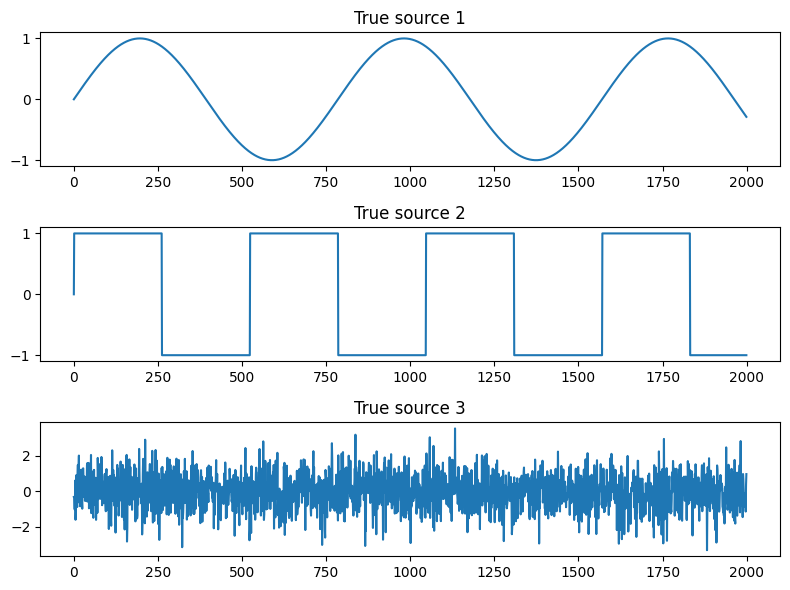

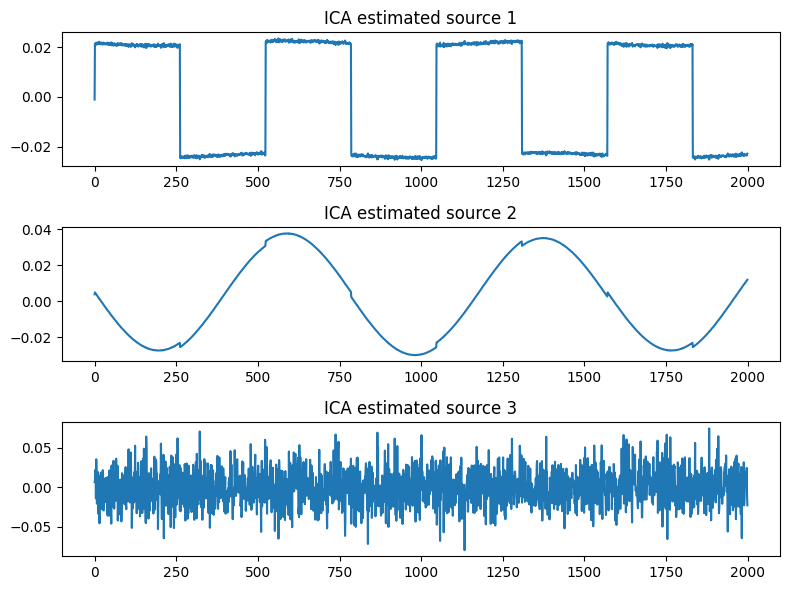

In [ ]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# create a simulated dataset with 3 independent sources
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = np.random.normal(size=n_samples)
S = np.c_[s1, s2, s3]

# mix the sources using a random mixing matrix
A = np.array([[0.5, 0.1, 0.3], [0.2, 0.8, 0.5], [0.1, 0.3, 0.7]])
X = np.dot(S, A.T)

# apply FastICA algorithm to recover the sources
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

# plot the original sources and the estimated sources
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S[:, 0])
plt.title('True source 1')
plt.subplot(3, 1, 2)
plt.plot(S[:, 1])
plt.title('True source 2')
plt.subplot(3, 1, 3)
plt.plot(S[:, 2])
plt.title('True source 3')
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S_[:, 0])
plt.title('ICA estimated source 1')
plt.subplot(3, 1, 2)
plt.plot(S_[:, 1])
plt.title('ICA estimated source 2')
plt.subplot(3, 1, 3)
plt.plot(S_[:, 2])
plt.title('ICA estimated source 3')
plt.tight_layout()
plt.show()

Đoạn code trên:
* đầu tiên chúng ta tạo ra các tập dữ liệu mô phỏng với các nguồn tính hiệu bằng cách sử dụng các phương trình toán học khác nhau để tạo ra các tính hiệu
* sau đó chúng ta sử dụng phương pháp ICA để phân tách các nguồn tín hiệu từ tín hiệu quan sát X. Kết quả phân tách được lưu trữ trong biến S_
* Cuối cùng, chúng ta sử dụng các hàm plt.plot() để trực quan hóa kết quả phân tách bằng cách so sánh các nguồn tín hiệu ban đầu và các nguồn tín hiệu được phân tách.



# dưới đây là đoạn implement with other sources.

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


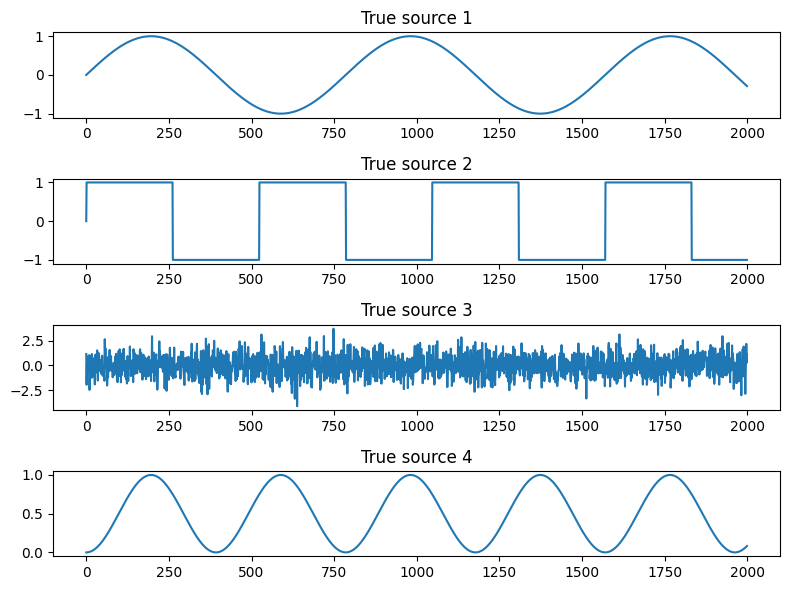

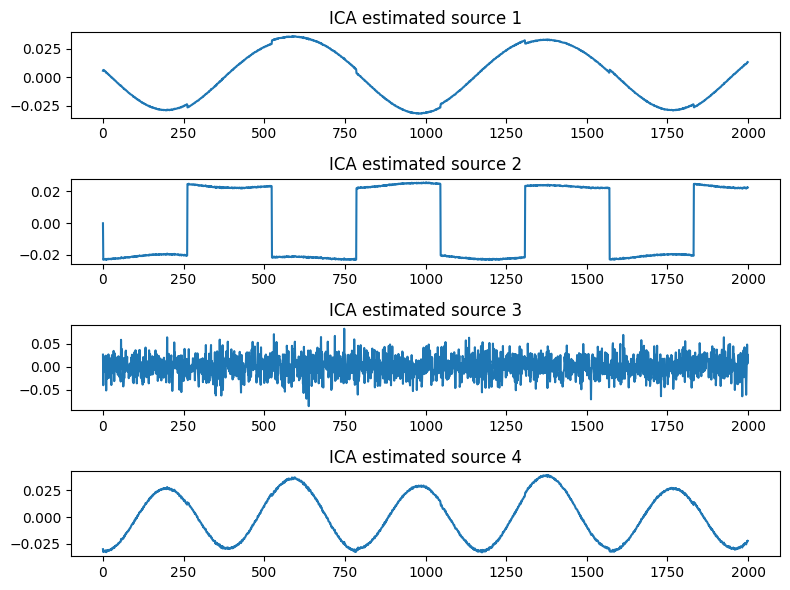

In [ ]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# create a simulated dataset with 4 independent sources
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = np.random.normal(size=n_samples)
s4 = np.square(np.sin(2 * time))
S = np.c_[s1, s2, s3, s4]

# mix the sources using a random mixing matrix
A = np.array([[0.5, 0.1, 0.3, 0.2], [0.2, 0.8, 0.5, 0.1], [0.1, 0.3, 0.7, 0.4], [0.3, 0.2, 0.4, 0.8]])
X = np.dot(S, A.T)

# apply FastICA algorithm to recover the sources
ica = FastICA(n_components=4)
S_ = ica.fit_transform(X)

# plot the original sources and the estimated sources
plt.figure(figsize=(8, 6))
plt.subplot(4, 1, 1)
plt.plot(S[:, 0])
plt.title('True source 1')
plt.subplot(4, 1, 2)
plt.plot(S[:, 1])
plt.title('True source 2')
plt.subplot(4, 1, 3)
plt.plot(S[:, 2])
plt.title('True source 3')
plt.subplot(4, 1, 4)
plt.plot(S[:, 3])
plt.title('True source 4')
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.subplot(4, 1, 1)
plt.plot(S_[:, 0])
plt.title('ICA estimated source 1')
plt.subplot(4, 1, 2)
plt.plot(S_[:, 1])
plt.title('ICA estimated source 2')
plt.subplot(4, 1, 3)
plt.plot(S_[:, 2])
plt.title('ICA estimated source 3')
plt.subplot(4, 1, 4)
plt.plot(S_[:, 3])
plt.title('ICA estimated source 4')
plt.tight_layout()
plt.show()

**2.2 Viết một Python code cho FastICA algorithm (step by step) using Numpy.**

Reference: https://hbenbel.github.io/blog/fastica/ (You can use some functions in this link but need to note the role of each function and note each step)

Run your code with the same sources above and compare the results using modules imported from scikit-learn. Give your comments.

In [ ]:
import numpy as np


# Definition of G'
def Gprime(x):
    return np.tanh(x)

# Definition of G''
def Gsecond(x):
    return np.ones(x.shape) - np.power(np.tanh(x), 2)

# Center matrix X
def centerMatrix(X, N):
    mean = X.mean(axis=1)
    M = X - (mean.reshape((N, 1)) @ np.ones((1, X.shape[1])))
    return M

# Whiten matrix X with eigenvalue decomposition
def whitenMatrix(X):
    D, E = np.linalg.eigh(X @ X.T)
    DE = np.diag(1/np.sqrt(D + 1e-5)) @ E.T

    return DE @ X

# One-unit algorithm step
def oneUnit(X, wp):
    term1 = np.mean((X @ Gprime(wp @ X).T), axis=1)
    term2 = np.mean(Gsecond(wp @ X), axis=1) * wp
    return term1 - term2

# Deflationary orthogonalization
def orthogonalize(W, wp, i):
    return wp - ((wp @ W[:i,:].T) @ W[:i,:])

# wp normalization
def normalize(wp):
    return wp / np.linalg.norm(wp)


def fastICA(X, C, max_iter):
    N = X.shape[0]
    X = centerMatrix(X, N)
    X = whitenMatrix(X)

    W = np.zeros((C, N))
    for i in range(C):
        wp = np.random.rand(1, N)
        for _ in range(max_iter):
            wp = oneUnit(X, wp)
            wp = orthogonalize(W, wp, i)
            wp = normalize(wp)
            W[i,:] = wp

    return W @ X

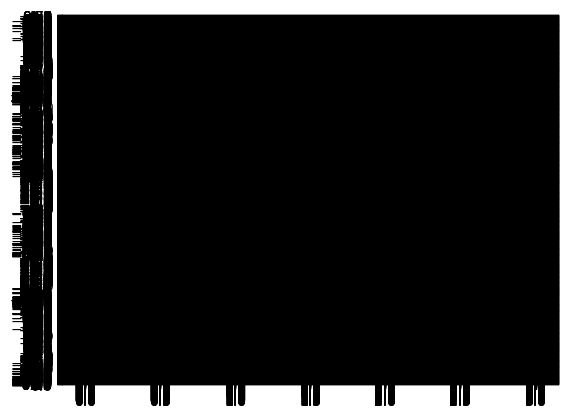

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


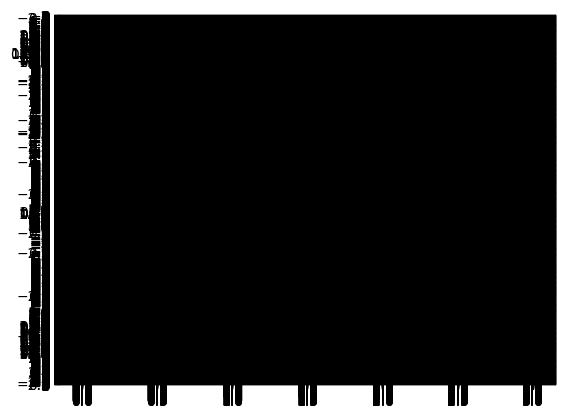

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to load the audio data
def loadData(dataPath, nsources=9, size=50000):
    data = np.empty((nsources, size), np.float32)

    for i in range(nsources):
        fs, data[i,:] = wavfile.read(os.path.join(dataPath, 'mix') + str(i+1) + '.wav')

    return fs, data

# Function to display the audio spectrum
def displayData(X):
    C = X.shape[0]

    for i in range(C):
        plt.subplot(C, 1, i + 1)
        plt.plot(X[i,:])
    plt.show()

# Function to save the audio data separated by fastica
def saveData(saveDataPath, fs, X):
    for i in range(X.shape[0]):
        wavfile.write(os.path.join(saveDataPath, 'ica_') + str(i + 1) + ".wav", fs, X[i,:])


X = X.T
displayData(X)

ica = FastICA(n_components=4)
S_ = ica.fit_transform(X)

#S = fastICA(X, nComponents)
displayData(S)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [ ]:
# set seed for reproducible results
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# sinusoidal signal
s1 = np.sin(2 * time)
# square signal
s2 = np.sign(np.sin(3 * time))
# sawtooth signal
s3 = signal.sawtooth(2 * np.pi * time)

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [ ]:
# compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

# compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # estimate PCA sources

plt.figure(figsize=(9, 6))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA estimated sources',
         'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()

**Further exercises** Tìm hiểu ICA in EEG, EOG signal, ICA có thể dùng để làm gì trong các tín hiệu điện não đồ trên. Tìm hiểu MNE tools: https://mne.tools/stable/

Reference:

https://sccn.ucsd.edu/~jung/Site/EEG_artifact_removal.html

https://arnauddelorme.com/ica_for_dummies/